In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import warnings
import plotly.express as px 

In [2]:
#To Suppress the Warnings
warnings.filterwarnings("ignore")

In [3]:
#Loading Dataset
dataset = pd.read_csv("Zomato_Chennai_Dataset.csv")
dataset

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"
...,...,...,...,...,...,...,...,...,...,...,...,...
12027,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Porur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12028,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Kolathur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12029,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Anna Nagar East,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12030,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Ramapuram,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"


In [4]:
dataset.shape

(12032, 12)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             12032 non-null  object 
 1   Name of Restaurant     12032 non-null  object 
 2   Address                12032 non-null  object 
 3   Location               12032 non-null  object 
 4   Cuisine                12032 non-null  object 
 5   Top Dishes             12032 non-null  object 
 6   Price for 2            12032 non-null  float64
 7   Dining Rating          6681 non-null   float64
 8   Dining Rating Count    11812 non-null  object 
 9   Delivery Rating        6181 non-null   float64
 10  Delivery Rating Count  11812 non-null  object 
 11  Features               12032 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1.1+ MB


In [6]:
#Dropping the Unwanted Columns
dataset.drop(columns = ["Zomato URL","Address"],axis = 1,inplace = True)
dataset

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,KFC,Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"
...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12028,CK's Sandwiches,Kolathur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12029,CK's Sandwiches,Anna Nagar East,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12030,CK's Sandwiches,Ramapuram,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"


In [7]:
dataset.describe()

,Price for 2,Dining Rating,Delivery Rating
count,12032.000000,6681.000000,6181.000000
mean,397.611370,3.387756,3.805290
std,332.045938,0.558181,0.374213
min,40.000000,0.300000,0.300000
25%,200.000000,3.100000,3.600000
50%,300.000000,3.500000,3.900000
75%,450.000000,3.800000,4.000000
max,5000.000000,4.900000,4.700000


In [8]:
#Checking for Null Values
dataset.isnull().sum()

Name of Restaurant          0
Location                    0
Cuisine                     0
Top Dishes                  0
Price for 2                 0
Dining Rating            5351
Dining Rating Count       220
Delivery Rating          5851
Delivery Rating Count     220
Features                    0
dtype: int64

In [9]:
dataset["Dining Rating"].value_counts()

Dining Rating
3.6    584
3.5    553
3.7    525
3.4    500
3.3    463
3.8    460
3.2    433
3.9    379
3.1    363
2.0    354
3.0    302
4.0    288
2.9    257
4.1    221
2.8    192
4.2    142
2.7    138
4.3    105
2.6     99
2.5     71
4.4     61
2.4     46
4.5     36
2.3     32
2.2     20
4.6     17
4.7     12
2.1     10
4.9      7
4.8      4
1.9      3
1.7      2
0.3      1
1.0      1
Name: count, dtype: int64

In [10]:
dataset[dataset["Dining Rating"].isnull()]

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
6,Bai Veetu Kalyanam,Navallur,['Biryani'],"['Bread Halwa', ' Mutton Biryani', ' Brinjal G...",350.0,NaN,Does not offer Dining,4.3,1061,['Home Delivery']
77,Al Dhareeq Beef Biriyani,Kodambakkam,['Biryani'],['Beef Biryani'],300.0,NaN,Does not offer Dining,3.9,19600,['Home Delivery']
106,Twilight Take Out,Nungambakkam,"['North Indian', ' Chinese', ' Rolls', ' Conti...","['Club Sandwich', ' Chicken Tikka Roll', ' Chi...",350.0,NaN,Does not offer Dining,4.0,11200,"['Home Delivery', 'Free Parking']"
107,The Red Box,Anna Nagar West,['Chinese'],"['Noodle', ' Chilli Chicken Gravy', ' Dragon C...",200.0,NaN,Does not offer Dining,4.2,11500,['Home Delivery']
114,Charminar Biriyani Centre,Royapettah,"['Biryani', ' North Indian']","['Chicken Biryani', ' Bread Halwa', ' Brinjal ...",300.0,NaN,Does not offer Dining,3.9,652,"['Home Delivery', 'Standing Tables']"
...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12028,CK's Sandwiches,Kolathur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12029,CK's Sandwiches,Anna Nagar East,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12030,CK's Sandwiches,Ramapuram,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"


In [11]:
#Replacing the Null Values with 0 
dataset.fillna("0",axis = 0, inplace = True)
dataset

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,KFC,Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"
...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,['Sandwich'],Invalid,350.0,0,0,0,0,"['Breakfast', 'Delivery Only']"
12028,CK's Sandwiches,Kolathur,['Sandwich'],Invalid,350.0,0,0,0,0,"['Breakfast', 'Delivery Only']"
12029,CK's Sandwiches,Anna Nagar East,['Sandwich'],Invalid,350.0,0,0,0,0,"['Breakfast', 'Delivery Only']"
12030,CK's Sandwiches,Ramapuram,['Sandwich'],Invalid,350.0,0,0,0,0,"['Breakfast', 'Delivery Only']"


In [12]:
dataset.isnull().sum()

Name of Restaurant       0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
Features                 0
dtype: int64

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name of Restaurant     12032 non-null  object 
 1   Location               12032 non-null  object 
 2   Cuisine                12032 non-null  object 
 3   Top Dishes             12032 non-null  object 
 4   Price for 2            12032 non-null  float64
 5   Dining Rating          12032 non-null  object 
 6   Dining Rating Count    12032 non-null  object 
 7   Delivery Rating        12032 non-null  object 
 8   Delivery Rating Count  12032 non-null  object 
 9   Features               12032 non-null  object 
dtypes: float64(1), object(9)
memory usage: 940.1+ KB


In [14]:
dataset["Dining Rating Count"].value_counts()

Dining Rating Count
Does not offer Dining        2603
Not enough Dining Reviews    2528
4                             339
5                             271
6                             248
                             ... 
877                             1
897                             1
872                             1
1197                            1
224                             1
Name: count, Length: 793, dtype: int64

In [15]:
#Replacing the Invalid Values with valid values
dataset["Dining Rating Count"].replace(to_replace = ["Does not offer Dining","Not enough Dining Reviews"], value = 0, inplace = True)

In [16]:
dataset["Dining Rating Count"].value_counts()

Dining Rating Count
0       5131
4        339
5        271
6        248
0        240
        ... 
877        1
897        1
872        1
1197       1
224        1
Name: count, Length: 792, dtype: int64

In [17]:
dataset["Delivery Rating Count"].value_counts()

Delivery Rating Count
Not enough Delivery Reviews    3379
Does not offer Delivery        2252
0                               239
27                               34
40                               30
                               ... 
7705                              1
6374                              1
3677                              1
588                               1
1617                              1
Name: count, Length: 2281, dtype: int64

In [18]:
dataset["Delivery Rating Count"].replace(to_replace = ["Does not offer Delivery","Not enough Delivery Reviews"], value = 0, inplace = True)

In [19]:
dataset["Delivery Rating Count"].value_counts()

Delivery Rating Count
0       5631
0        239
27        34
37        30
60        30
        ... 
7705       1
6374       1
3677       1
588        1
1617       1
Name: count, Length: 2280, dtype: int64

In [20]:
#Converting the Columns from Object type to Numerical Type
dataset["Dining Rating"] = dataset["Dining Rating"].astype("float64")
dataset["Dining Rating Count"] = dataset["Dining Rating Count"].astype("int64")
dataset["Delivery Rating"] = dataset["Delivery Rating"].astype("float64")
dataset["Delivery Rating Count"] = dataset["Delivery Rating Count"].astype("int64")

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name of Restaurant     12032 non-null  object 
 1   Location               12032 non-null  object 
 2   Cuisine                12032 non-null  object 
 3   Top Dishes             12032 non-null  object 
 4   Price for 2            12032 non-null  float64
 5   Dining Rating          12032 non-null  float64
 6   Dining Rating Count    12032 non-null  int64  
 7   Delivery Rating        12032 non-null  float64
 8   Delivery Rating Count  12032 non-null  int64  
 9   Features               12032 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 940.1+ KB


In [22]:
dataset

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,KFC,Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"
...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,['Sandwich'],Invalid,350.0,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"
12028,CK's Sandwiches,Kolathur,['Sandwich'],Invalid,350.0,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"
12029,CK's Sandwiches,Anna Nagar East,['Sandwich'],Invalid,350.0,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"
12030,CK's Sandwiches,Ramapuram,['Sandwich'],Invalid,350.0,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"


In [23]:
#Replacing the Unwanted characters like '[', ']'
STR_TO_REPLACE = ["\[","\]","\'"]

for column in ["Cuisine","Top Dishes","Features"]:
    for char in STR_TO_REPLACE:
        dataset[column] = dataset[column].str.replace(char,"",regex = True)
    


In [24]:
dataset

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,Biryani,"Bread Halwa, Chicken 65, Mutton Biryani, Ch...",500.0,4.3,1500,4.3,9306,"Home Delivery, Indoor Seating"
1,Sukkubhai Biriyani,Alandur,"Biryani, North Indian, Mughlai, Desserts, ...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",1000.0,4.4,3059,4.1,39200,"Home Delivery, Free Parking, Table booking rec..."
2,SS Hyderabad Biryani,Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",500.0,4.3,1361,4.4,10500,"Home Delivery, Indoor Seating"
3,KFC,Perambur,"Burger, Fast Food, Finger Food, Beverages",Zinger Burger,500.0,4.0,1101,4.0,11200,"Home Delivery, Free Parking, Card Upon Deliver..."
4,Tasty Kitchen,Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",450.0,4.2,617,4.1,22400,"Home Delivery, Indoor Seating"
...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,Sandwich,Invalid,350.0,0.0,0,0.0,0,"Breakfast, Delivery Only"
12028,CK's Sandwiches,Kolathur,Sandwich,Invalid,350.0,0.0,0,0.0,0,"Breakfast, Delivery Only"
12029,CK's Sandwiches,Anna Nagar East,Sandwich,Invalid,350.0,0.0,0,0.0,0,"Breakfast, Delivery Only"
12030,CK's Sandwiches,Ramapuram,Sandwich,Invalid,350.0,0.0,0,0.0,0,"Breakfast, Delivery Only"


In [25]:
dataset["Top Dishes"].value_counts()

Top Dishes
Invalid                                                                                                                9641
Biryani                                                                                                                  30
Coffee                                                                                                                   14
Chicken Biryani                                                                                                          12
Pizza,  Garlic Bread                                                                                                     11
                                                                                                                       ... 
Burgers,  Sandwich,  Beef Burger,  Burger Combo,  French Fries,  Cheese Corn Nuggets                                      1
Fish,  Chicken 65,  Chicken Biryani,  Fried Rice,  Chilli Chicken                                                        

In [26]:
dataset["Top Dishes"].replace(to_replace = ["Invalid"], value = 'NA' , inplace = True)

In [27]:
#Removing Useles data from the dataset like dining rating 0 and delivery rating 0
uselessData  =  (dataset['Dining Rating'] == 0) & (dataset['Delivery Rating'] == 0)
dataset = dataset[~uselessData]
dataset

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,Biryani,"Bread Halwa, Chicken 65, Mutton Biryani, Ch...",500.0,4.3,1500,4.3,9306,"Home Delivery, Indoor Seating"
1,Sukkubhai Biriyani,Alandur,"Biryani, North Indian, Mughlai, Desserts, ...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",1000.0,4.4,3059,4.1,39200,"Home Delivery, Free Parking, Table booking rec..."
2,SS Hyderabad Biryani,Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",500.0,4.3,1361,4.4,10500,"Home Delivery, Indoor Seating"
3,KFC,Perambur,"Burger, Fast Food, Finger Food, Beverages",Zinger Burger,500.0,4.0,1101,4.0,11200,"Home Delivery, Free Parking, Card Upon Deliver..."
4,Tasty Kitchen,Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",450.0,4.2,617,4.1,22400,"Home Delivery, Indoor Seating"
...,...,...,...,...,...,...,...,...,...,...
11901,Dhabba On Wheels,Okkiyampet,North Indian,NA,500.0,0.0,0,3.0,54,"Home Delivery, Indoor Seating"
11914,Sandwich Sisters,Velachery,Sandwich,NA,200.0,0.0,0,3.6,75,"Home Delivery, Free Parking"
11953,The Sandwich Box,Navallur,"Sandwich, Fast Food, Beverages",NA,300.0,0.0,0,3.9,21,"Home Delivery, Indoor Seating"
11959,The Shangai Story,Madipakkam,Chinese,NA,350.0,0.0,0,2.9,17,Delivery Only


In [28]:
dataset.head()

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,Biryani,"Bread Halwa, Chicken 65, Mutton Biryani, Ch...",500.0,4.3,1500,4.3,9306,"Home Delivery, Indoor Seating"
1,Sukkubhai Biriyani,Alandur,"Biryani, North Indian, Mughlai, Desserts, ...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",1000.0,4.4,3059,4.1,39200,"Home Delivery, Free Parking, Table booking rec..."
2,SS Hyderabad Biryani,Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",500.0,4.3,1361,4.4,10500,"Home Delivery, Indoor Seating"
3,KFC,Perambur,"Burger, Fast Food, Finger Food, Beverages",Zinger Burger,500.0,4.0,1101,4.0,11200,"Home Delivery, Free Parking, Card Upon Deliver..."
4,Tasty Kitchen,Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",450.0,4.2,617,4.1,22400,"Home Delivery, Indoor Seating"


In [29]:
dataset["Location"].value_counts() 

Location
Porur                                       270
Velachery                                   255
T. Nagar                                    235
Anna Nagar East                             227
Ambattur                                    213
                                           ... 
IBIS Hotel, Old Mahabalipuram Road (OMR)      1
The Slate                                     1
Eat And Pack, Ambattur                        1
The Pride Hotel, Kilpauk                      1
Chandra Metro Mall, Virugambakkam             1
Name: count, Length: 264, dtype: int64

In [30]:
dataset['Location'].str.replace(r"^.*?,",'',regex=True) 

0         Pallavaram
1            Alandur
2        Kodambakkam
3           Perambur
4           Perambur
            ...     
11901     Okkiyampet
11914      Velachery
11953       Navallur
11959     Madipakkam
11960        Egatoor
Name: Location, Length: 8481, dtype: object

In [43]:
#Replacing the Location with Shorter Names
dataset["Location"].replace("The Pride Hotel, Kilpauk","Kilpauk",inplace = True)
dataset["Location"].replace("Chandra Metro Mall, Virugambakkam","Virugambakkam",inplace = True)
dataset["Location"].replace("Hotel Blue Diamond, Kilpauk","Kilpauk",inplace = True)
dataset["Location"].replace("Hotel Poigai, Arumbakkam","Arumbakkam",inplace = True)
dataset["Location"].replace("Hotel Maurya International, Vadapalani","Vadapalani",inplace = True)
dataset["Location"].replace("GLM Meridian Hotel, T. Nagar","T. Nagar",inplace = True)
dataset.loc[dataset["Location"].str.contains("Ambattur"), "Location"] = "Ambattur"
dataset['Location'] = dataset['Location'].str.replace(' West| west| East| east','',regex=True)

In [50]:
dataset['Location'].value_counts()

Location
Anna Nagar                                   396
Porur                                        270
Velachery                                    255
Ambattur                                     239
T. Nagar                                     236
                                            ... 
Keys Hotel, Thiruvanmiyur                      1
Golden Sun Resort, Mamallapuram                1
Jade Resorts, Coast Road (ECR)                 1
IBIS Chennai, OMR                              1
Four Points by Sheraton, Coast Road (ECR)      1
Name: count, Length: 254, dtype: int64

In [126]:
#Splittig the Location Name with delimiter as (,)
loc_ = dataset['Location'].str.split("\,",n = 1, expand = True)
loc_

,0,1
0,Pallavaram,None
1,Alandur,None
2,Kodambakkam,None
3,Perambur,None
4,Perambur,None
...,...,...
11901,Okkiyampet,None
11914,Velachery,None
11953,Navallur,None
11959,Madipakkam,None


In [129]:
#Replacing the Location column with shorter location name
loc_[2] = loc_[1]
loc_.loc[loc_[1].isnull(), 2] = loc_[0]
dataset['Location'] = loc_[2][loc_[2].notnull()]

In [130]:
dataset['Location'].value_counts()

Location
Anna Nagar       396
Porur            270
Velachery        255
Ambattur         239
T. Nagar         236
                ... 
 Vepery            1
 Kanchipuram       1
 Adyar             1
 Triplicane        1
The Slate          1
Name: count, Length: 180, dtype: int64

In [131]:
dataset["Features"]

0                            Home Delivery, Indoor Seating
1        Home Delivery, Free Parking, Table booking rec...
2                            Home Delivery, Indoor Seating
3        Home Delivery, Free Parking, Card Upon Deliver...
4                            Home Delivery, Indoor Seating
                               ...                        
11901                        Home Delivery, Indoor Seating
11914                          Home Delivery, Free Parking
11953                        Home Delivery, Indoor Seating
11959                                        Delivery Only
11960                                        Delivery Only
Name: Features, Length: 8481, dtype: object

In [132]:
dataset

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,Biryani,"Bread Halwa, Chicken 65, Mutton Biryani, Ch...",500.0,4.3,1500,4.3,9306,"Home Delivery, Indoor Seating"
1,Sukkubhai Biriyani,Alandur,"Biryani, North Indian, Mughlai, Desserts, ...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",1000.0,4.4,3059,4.1,39200,"Home Delivery, Free Parking, Table booking rec..."
2,SS Hyderabad Biryani,Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",500.0,4.3,1361,4.4,10500,"Home Delivery, Indoor Seating"
3,KFC,Perambur,"Burger, Fast Food, Finger Food, Beverages",Zinger Burger,500.0,4.0,1101,4.0,11200,"Home Delivery, Free Parking, Card Upon Deliver..."
4,Tasty Kitchen,Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",450.0,4.2,617,4.1,22400,"Home Delivery, Indoor Seating"
...,...,...,...,...,...,...,...,...,...,...
11901,Dhabba On Wheels,Okkiyampet,North Indian,NA,500.0,0.0,0,3.0,54,"Home Delivery, Indoor Seating"
11914,Sandwich Sisters,Velachery,Sandwich,NA,200.0,0.0,0,3.6,75,"Home Delivery, Free Parking"
11953,The Sandwich Box,Navallur,"Sandwich, Fast Food, Beverages",NA,300.0,0.0,0,3.9,21,"Home Delivery, Indoor Seating"
11959,The Shangai Story,Madipakkam,Chinese,NA,350.0,0.0,0,2.9,17,Delivery Only


In [137]:
#Checking for Duplicate Records
dataset[dataset.duplicated()]

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features


In [140]:
#Copying the Cleaned Dataset
zomato_chennai = dataset.copy()
zomato_chennai

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,Biryani,"Bread Halwa, Chicken 65, Mutton Biryani, Ch...",500.0,4.3,1500,4.3,9306,"Home Delivery, Indoor Seating"
1,Sukkubhai Biriyani,Alandur,"Biryani, North Indian, Mughlai, Desserts, ...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",1000.0,4.4,3059,4.1,39200,"Home Delivery, Free Parking, Table booking rec..."
2,SS Hyderabad Biryani,Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",500.0,4.3,1361,4.4,10500,"Home Delivery, Indoor Seating"
3,KFC,Perambur,"Burger, Fast Food, Finger Food, Beverages",Zinger Burger,500.0,4.0,1101,4.0,11200,"Home Delivery, Free Parking, Card Upon Deliver..."
4,Tasty Kitchen,Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",450.0,4.2,617,4.1,22400,"Home Delivery, Indoor Seating"
...,...,...,...,...,...,...,...,...,...,...
11901,Dhabba On Wheels,Okkiyampet,North Indian,NA,500.0,0.0,0,3.0,54,"Home Delivery, Indoor Seating"
11914,Sandwich Sisters,Velachery,Sandwich,NA,200.0,0.0,0,3.6,75,"Home Delivery, Free Parking"
11953,The Sandwich Box,Navallur,"Sandwich, Fast Food, Beverages",NA,300.0,0.0,0,3.9,21,"Home Delivery, Indoor Seating"
11959,The Shangai Story,Madipakkam,Chinese,NA,350.0,0.0,0,2.9,17,Delivery Only


# Performing Exploratory Data Analysis

1) Top 10 Chinese Restaurant in Chennai ?

In [171]:
chinese_rest = zomato_chennai[zomato_chennai["Cuisine"].str.contains("Chinese")]
chinese_rest = chinese_rest.sort_values(by = "Dining Rating", ascending = False).reset_index().head(10)
chinese_rest

,index,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,443,Avartana - ITC Grand Chola,Guindy,"South Indian, Chinese, Desserts","Chole, Carrot Ice Cream, Dumplings, Wine, ...",4500.0,4.8,371,0.0,0,"Full Bar Available, Table reservation required..."
1,195,The Marina,Nungambakkam,"Seafood, North Indian, Chinese","Sea Food, Jumbo Prawns, Biryani, Fish Mango...",1600.0,4.8,1082,4.3,373,"Home Delivery, Indoor Seating, Table reservati..."
2,163,Momo Sa-Khang by Kailash Kitchen,Choolaimedu,"Momos, Chinese","Momos, Noodle, Chowmein, Fried Momo, Chop ...",350.0,4.8,1658,4.5,2825,"Home Delivery, Free Parking, Indoor Seating"
3,382,Wok Monk,Anna Nagar,"Asian, Chinese, Middle Eastern","Dumplings, Chocolate Tsunami, Pizza, Momos,...",1200.0,4.6,459,3.9,659,"Home Delivery, Indoor Seating"
4,102,Mainland China,Velachery,"Chinese, Asian, Sushi, Japanese, Thai","Noodle, Dumplings, Momos, Hakka Noodles, M...",1800.0,4.6,1498,4.2,335,"Home Delivery, Mall Parking, Valet Parking Ava..."
5,8757,Yaa Mohaideen Biryani,Pallavaram,"Biryani, Chinese, Tamil","Mutton Biryani, Chicken 65, Chicken Biryani,...",600.0,4.5,3414,0.0,0,"Indoor Seating, Table Reservation Not Required"
6,243,Asia Kitchen by Mainland China,Nungambakkam,"Momos, Asian, Chinese, Sushi","Dumplings, Mocktails, Fish, Treasure Soup, ...",1800.0,4.5,872,4.1,882,"Home Delivery, Valet Parking Available, Buffet..."
7,9037,Palmshore,Medavakkam,"North Indian, Chinese, Arabian, BBQ, Birya...","Mutton Mandi, Biryani, Brownie, Bbq Fish, ...",1000.0,4.5,1942,3.8,4379,"Home Delivery, Valet Parking Available, Indoor..."
8,207,Va Pho - Asian Canteen,Gopalapuram,"Asian, Chinese, Beverages","Noodle, Mocktails, Beef Sate, Momos, Falud...",1400.0,4.5,1040,3.9,145,"Home Delivery, Valet Parking Available, Table ..."
9,110,VB Signature,Nungambakkam,"North Indian, South Indian, Chinese, Asian,...","Momos, Idiyappam, Pumpkin Soup, Coconut Sou...",1000.0,4.5,1611,3.8,750,"Breakfast, Home Delivery, Vegetarian Only, Liv..."


2) Highly Rated Veg Restaurant in Anna Nagar?

In [172]:
veg_rest = zomato_chennai[zomato_chennai["Features"].str.contains("Veg")]
veg_rest = veg_rest[veg_rest["Location"].str.contains("Anna Nagar")]
veg_rest = veg_rest.sort_values(by = "Dining Rating" , ascending = False).reset_index()
veg_rest.head(10)

,index,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,9123,Little Italy,Anna Nagar,"Italian, Mexican, Salad","Pasta, Pizza, Nachos, Chocolate Bomb, Mush...",1500.0,4.5,487,4.1,843,"Home Delivery, Vegetarian Only, Valet Parking ..."
1,78,Shri Rajasthani Dhaba,Anna Nagar,"Rajasthani, North Indian","Rajasthani Thali, Buttermilk, Roti, Paratha...",500.0,4.5,983,4.5,5537,"Home Delivery, Vegetarian Only, Indoor Seating..."
2,9366,Cream Stone,Anna Nagar,"Desserts, Ice Cream","Tiramisu, Nutella Brownie, Chocolava, Ferre...",350.0,4.4,741,4.2,3707,"Home Delivery, Vegetarian Only, Indoor Seating..."
3,9016,Shree Mithai,Anna Nagar,"Mithai, Street Food, Fast Food","Chaat, Thali, Panipuri, Badam Milk, Rasmal...",300.0,4.4,1267,4.2,18700,"Breakfast, Home Delivery, Vegetarian Only, Fre..."
4,9283,Cream Centre,Anna Nagar,"North Indian, Italian, Fast Food, Chinese, ...","Nachos, Onion Rings, Malai Kofta, Brownie F...",1600.0,4.4,623,4.2,1028,"Home Delivery, Vegetarian Only, Indoor Seating..."
5,65,Sree Akshayam,Anna Nagar,"South Indian, North Indian, Chinese, Chetti...","Paratha, Paneer Tikka, Naan, Pongal, Filte...",700.0,4.3,1225,3.9,12600,"Breakfast, Home Delivery, Vegetarian Only, Ind..."
6,121,Roll Over,Anna Nagar,"Ice Cream, Desserts, Fast Food","Rolls, Ice Cream Roll, Coffee, Fries, Choc...",450.0,4.3,721,3.7,378,"Home Delivery, Vegetarian Only, Free Parking, ..."
7,8926,Shri Balaajee Bhavan,Anna Nagar,"South Indian, North Indian","Filtered Coffee, Vada Curry, Thali, Pongal,...",500.0,4.3,776,4.2,20900,"Breakfast, Home Delivery, Vegetarian Only, Ind..."
8,1485,Jayruka Delicacies,Anna Nagar,"South Indian, Fast Food, Beverages","Pancakes, Pasta, Double Ka Meetha, Idiyappa...",400.0,4.1,103,3.8,1858,"Home Delivery, Vegetarian Only, Lunch Menu, In..."
9,10028,Creamy Inn,Anna Nagar,"Ice Cream, Desserts, Beverages","Waffles, Thick Shakes",250.0,4.1,224,4.0,708,"Home Delivery, Vegetarian Only, Indoor Seating..."


 3) What is the Avg Price Distibution of highest rated restaurant for each Cuisine Type in Mumbai?

In [ ]:
avg_price = zomato_chennai["Dining Rating"]

4) No Dining Rataurant in Chennai?

In [179]:
no_dining_rest = zomato_chennai[zomato_chennai["Features"].str.contains("Delivery Only")]
no_dining_rest

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
307,Faasos,Porur,"Fast Food, North Indian, Biryani, Rolls","Chicken Wrap, Biryani, Paratha, Chocolate F...",450.0,0.0,0,4.1,10900,Delivery Only
571,Rollin,Potheri,"Continental, North Indian, Chinese, Pizza, ...","Salad, Spanish Omelette, Chicken Butter Masala",400.0,0.0,0,4.1,4952,Delivery Only
605,Verde,Egatoor,"South Indian, North Indian, Chinese",Veg Fried Rice,300.0,0.0,0,3.8,6038,"Breakfast, Delivery Only, Vegetarian Only"
717,Open Terrace Kitchen - Andhra Mess,Taramani,"Biryani, South Indian",Tomato Rice,300.0,0.0,0,3.5,11900,Delivery Only
763,ChappatiKings.com,Ambattur,"Chinese, South Indian, North Indian, Fast Food","Aloo Paratha, Vegetable Biryani, Panneer But...",350.0,0.0,0,3.3,4634,"Delivery Only, Vegetarian Only"
...,...,...,...,...,...,...,...,...,...,...
11880,Pav Wow,Karapakkam,Street Food,NA,200.0,0.0,0,3.7,36,Delivery Only
11889,Curry It Up,Anna Nagar,North Indian,NA,400.0,0.0,0,3.7,40,Delivery Only
11890,Curry It Up,Alwarpet,North Indian,NA,400.0,0.0,0,3.7,27,Delivery Only
11959,The Shangai Story,Madipakkam,Chinese,NA,350.0,0.0,0,2.9,17,Delivery Only


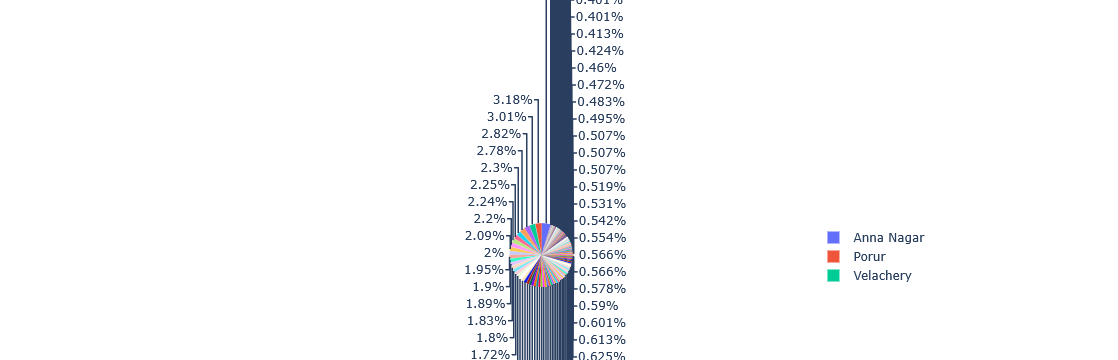

In [177]:
rest
px.pie(zomato_chennai, names = "Location")